In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import plot

#for offline plotting
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True) 

In [2]:
tesla = pd.read_csv('C:/Users/avijeet/Desktop/tesla.csv')
tesla.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900


In [3]:
tesla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2193 entries, 0 to 2192
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2193 non-null   object 
 1   Open       2193 non-null   float64
 2   High       2193 non-null   float64
 3   Low        2193 non-null   float64
 4   Close      2193 non-null   float64
 5   Adj Close  2193 non-null   float64
 6   Volume     2193 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 120.1+ KB


In [4]:
tesla['Date'] = pd.to_datetime(tesla['Date'])

In [5]:
print(f'Dataframe contains stock prices between {tesla.Date.min()} {tesla.Date.max()}') 
print(f'Total days = {(tesla.Date.max()  - tesla.Date.min()).days} days')

Dataframe contains stock prices between 2010-06-29 00:00:00 2019-03-15 00:00:00
Total days = 3181 days


In [6]:
tesla.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2193.000000,2193.000000,2193.000000,2193.000000,2193.000000,2.193000e+03
mean,175.652882,178.710262,172.412075,175.648555,175.648555,5.077449e+06
std,115.580903,117.370092,113.654794,115.580771,115.580771,4.545398e+06
min,16.139999,16.629999,14.980000,15.800000,15.800000,1.185000e+05
25%,33.110001,33.910000,32.459999,33.160000,33.160000,1.577800e+06
50%,204.990005,208.160004,201.669998,204.990005,204.990005,4.171700e+06
75%,262.000000,265.329987,256.209991,261.739990,261.739990,6.885600e+06
max,386.690002,389.609985,379.350006,385.000000,385.000000,3.716390e+07


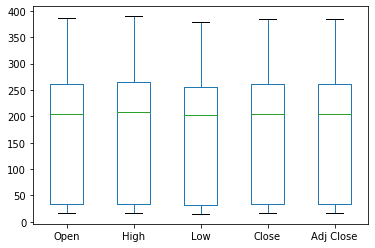

In [7]:
tesla[['Open','High','Low','Close','Adj Close']].plot(kind='box')

In [8]:
# Setting the layout for our plot
layout = go.Layout(
    title='Stock Prices of Tesla',
    xaxis=dict(
        title='Date',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    ),
    yaxis=dict(
        title='Price',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    )
)

tesla_data = [{'x':tesla['Date'], 'y':tesla['Close']}]
plot = go.Figure(data=tesla_data, layout=layout)

In [9]:
#plot(plot) #plotting offline
iplot(plot)

In [10]:
# Building the regression model
from sklearn.model_selection import train_test_split

#For preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

#For model evaluation
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

In [11]:
#Split the data into train and test sets
X = np.array(tesla.index).reshape(-1,1)
Y = tesla['Close']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=101)

scaler = StandardScaler().fit(X_train)
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train, Y_train)

trace0 = go.Scatter(
    x = X_train.T[0],
    y = Y_train,
    mode = 'markers',
    name = 'Actual'
)
trace1 = go.Scatter(
    x = X_train.T[0],
    y = lm.predict(X_train).T,
    mode = 'lines',
    name = 'Predicted'
)
tesla_data = [trace0,trace1]
layout.xaxis.title.text = 'Day'
plot2 = go.Figure(data=tesla_data, layout=layout)

iplot(plot2)

In [12]:
# Feature scaling
scaler = StandardScaler().fit(X_train)

In [12]:
from sklearn.linear_model import LinearRegression

In [13]:
#Creating a linear model
lm = LinearRegression()
lm.fit(X_train, Y_train)

LinearRegression()

In [14]:
#Plot actual and predicted values for train dataset
trace0 = go.Scatter(
    x = X_train.T[0],
    y = Y_train,
    mode = 'markers',
    name = 'Actual'
)
trace1 = go.Scatter(
    x = X_train.T[0],
    y = lm.predict(X_train).T,
    mode = 'lines',
    name = 'Predicted'
)
tesla_data = [trace0,trace1]
layout.xaxis.title.text = 'Day'
plot2 = go.Figure(data=tesla_data, layout=layout)

In [15]:
iplot(plot2)

In [17]:
#Calculate scores for model evaluation
scores = f'''
{'Metric'.ljust(10)}{'Train'.center(20)}{'Test'.center(20)}
{'r2_score'.ljust(10)}{r2_score(Y_train, lm.predict(X_train))}\t{r2_score(Y_test, lm.predict(X_test))}
{'MSE'.ljust(10)}{mse(Y_train, lm.predict(X_train))}\t{mse(Y_test, lm.predict(X_test))}
'''
print(scores)


Metric           Train                Test        
r2_score  0.8658871776828707	0.8610649253244574
MSE       1821.3833862936174	1780.987539418845



In [5]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import numpy as np
import pandas as pd

tesla = pd.read_csv('tesla.csv')
tesla.head()

X = np.array(tesla.index).reshape(-1, 1)
Y = tesla['Close']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=101)

scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)


tree_model = DecisionTreeRegressor()


tree_model.fit(X_train_scaled, Y_train)


X_test_scaled = scaler.transform(X_test)


predictions = tree_model.predict(X_test_scaled)


trace0 = go.Scatter(
    x=X_train.T[0],
    y=Y_train,
    mode='markers',
    name='Actual'
)
trace1 = go.Scatter(
    x=X_train.T[0],
    y=tree_model.predict(X_train_scaled).T,
    mode='lines',
    name='Predicted'
)
tesla_data = [trace0, trace1]
layout = go.Layout(
    xaxis={'title': 'Day'}
)
plot2 = go.Figure(data=tesla_data, layout=layout)

iplot(plot2)


In [6]:
from sklearn.metrics import r2_score


r2 = r2_score(Y_test, predictions)

print("R^2 Score:", r2)

R^2 Score: 0.9970891621871969


In [7]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)


X = np.array(tesla.index).reshape(-1, 1)
Y = tesla['Close']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=101)

scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)


forest_model = RandomForestRegressor(n_estimators=100, random_state=42)


forest_model.fit(X_train_scaled, Y_train)


X_test_scaled = scaler.transform(X_test)


predictions = forest_model.predict(X_test_scaled)


trace0 = go.Scatter(
    x=X_train.T[0],
    y=Y_train,
    mode='markers',
    name='Actual'
)
trace1 = go.Scatter(
    x=X_train.T[0],
    y=forest_model.predict(X_train_scaled).T,
    mode='lines',
    name='Predicted'
)
tesla_data = [trace0, trace1]
layout = go.Layout(
    xaxis={'title': 'Day'}
)
plot2 = go.Figure(data=tesla_data, layout=layout)

iplot(plot2)


In [8]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np


X = np.array(tesla.index).reshape(-1, 1)
Y = tesla['Close']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)


tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, Y_train)
tree_predictions = tree_model.predict(X_test)
tree_mse = mean_squared_error(Y_test, tree_predictions)


forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
forest_model.fit(X_train, Y_train)
forest_predictions = forest_model.predict(X_test)
forest_mse = mean_squared_error(Y_test, forest_predictions)

print("Decision Tree MSE:", tree_mse)
print("Random Forest MSE:", forest_mse)


Decision Tree MSE: 39.99862143980915
Random Forest MSE: 27.684388105816943
